In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
# El siguiente código lee el goal y el mapa del fichero

def lee_mapa(fichero):
    with open(fichero,'r') as archivo:
        lineas = archivo.readlines()
    numeros = [float(numero) for numero in lineas[0].split()]
    lineas.pop(0)
    lineas.reverse()
    matriz = []
    for linea in lineas:
        fila = [int(caracter) for caracter in linea.strip()]
        matriz.append(fila)
    return np.array(matriz),(numeros[0],numeros[1])

In [4]:
# Creamos un array que almacene el mapa que se le pase como parámetro a la función lee_mapa, definida anteriormente

mapa,destino = lee_mapa("../../data/map.txt")
print(mapa)
print(destino)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
  1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
  1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
  1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
  1 1 1 0 0 0 1 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1

In [5]:
def visualiza_mapa():
    plt.figure(figsize=(len(mapa[0]), len(mapa)))
    plt.imshow(1-mapa, cmap='gray', interpolation='none')
    plt.xlim(-0.5, len(mapa[0]) - 0.5)
    plt.ylim(-0.5, len(mapa) - 0.5)
    plt.gca().add_patch(plt.Circle(destino,radius = 0.5,edgecolor = 'red', facecolor = 'red'))

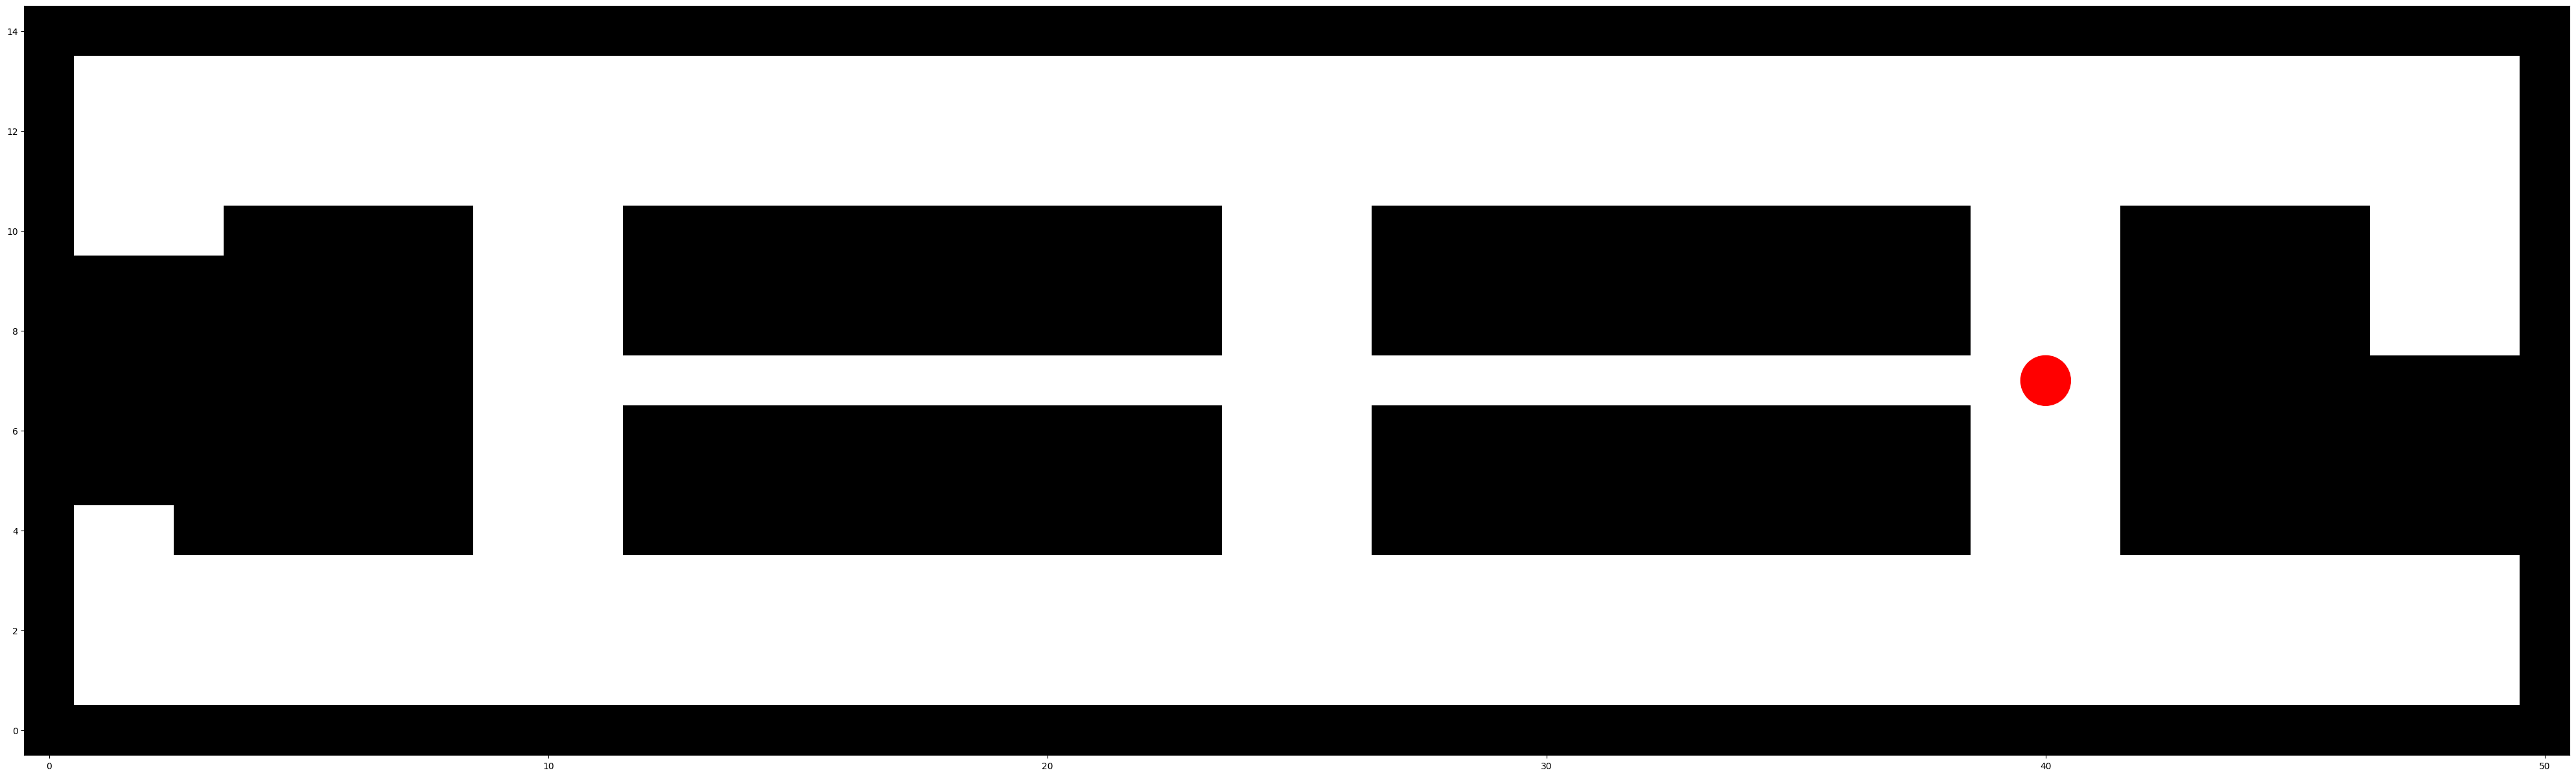

In [6]:
visualiza_mapa()

In [7]:
nav_estados = []
for i in range(0,mapa.shape[1]):
    for j in range(0,mapa.shape[0]):
        nav_estados.append(tuple([i,j]))
len(nav_estados)


765

In [8]:
nav_acciones = ['esperar','N','NE','E','SE','S','SO','O','NO']

In [34]:
def hay_colision(estado):
    # Verifica si hay una colisión en la casilla especificada por estado
    return mapa[estado[1], estado[0]] == 1

def es_terminal(estado):
    return estado == destino

def aplica_accion(estado, accion):
    # Si hay colisión en el estado actual, el estado no cambia pues no hay moviemientos posibles
    if hay_colision(estado):
        return estado
    x = estado[0]
    y = estado[1]

    # Actualiza las coordenadas x, y según la acción tomada
    if accion == 'N':
        y += 1
    elif accion == 'S':
        y -= 1
    elif accion == 'E':
        x += 1
    elif accion == 'O':
        x -= 1
    elif accion == 'NE':
        y += 1
        x += 1
    elif accion == 'SE':
        y -= 1
        x += 1
    elif accion == 'SO':
        y -= 1
        x -= 1
    elif accion == 'NO':
        y += 1
        x -= 1
    return x, y

def obtiene_posibles_errores(accion):
    # Devuelve una lista de posibles acciones erróneas que podrían ocurrir al ejecutar la acción dada, debido al
    # efecto estocástico de realizar las acciones.
    if accion == 'N':
        errores = ['NE', 'NO']
    elif accion == 'S':
        errores = ['SE', 'SO']
    elif accion == 'E':
        errores = ['NE', 'SE']
    elif accion == 'O':
        errores = ['NO', 'SO']
    elif accion == 'NE':
        errores = ['N', 'E']
    elif accion == 'NO':
        errores = ['N', 'O']
    elif accion == 'SE':
        errores = ['S', 'E']
    elif accion == 'SO':
        errores = ['S', 'O']
    else:
        errores = []
    return errores
    
def estados_sin_obstaculos():
    # Devuelve una lista de estados que no tienen obstáculos
    return [estado for estado in nav_estados if not hay_colision(estado)]

def acciones_posibles(estado):
    return [accion for accion in nav_acciones if not hay_colision(estado)]

def escoger_accion(estado, epsilon):
    # Si el estado no está en la tabla Q, inicializa sus valores a ceros
    if estado not in Q_table:
        Q_table[estado] = np.zeros(len(nav_acciones))
    
    # Usa una política epsilon-greedy para seleccionar una acción
    if np.random.rand() < epsilon:
        # Selecciona una acción aleatoria con probabilidad epsilon
        accion = np.random.randint(0, len(nav_acciones))
    else:
        # Selecciona la mejor acción conocida con probabilidad 1 - epsilon
        accion = np.argmax(Q_table[estado])
    return accion

def obtener_politica(Q):
    # Genera una política basada en la tabla Q
    politica = {}
    for estado in nav_estados:
        if estado in Q_table:
            politica[estado] = np.argmax(Q_table[estado])
        else:
            politica[estado] = 0
    return politica

penalizacion_colision = 10000
recompensa_objetivo_alcanzado = 1000
penalizacion_esperar = 200
penalizacion_casilla_adyacente_obstaculo = 500

def obtiene_recompensa(estado, accion):
    x, y = estado
    
    if estado == destino:
        return recompensa_objetivo_alcanzado
    elif hay_colision(estado):
        return -penalizacion_colision
    elif accion == 'esperar':
        return -penalizacion_esperar      

    for accion_error in obtiene_posibles_errores(accion):
        estado_vecino = aplica_accion(estado, accion_error)
        if hay_colision(estado_vecino):
            return -penalizacion_casilla_adyacente_obstaculo  # Recompensa baja para casillas adyacentes a los obstáculos

    # Calcula la recompensa en función de la distancia euclidiana al destino
    return - np.sqrt((x - destino[0])**2 + (y - destino[1])**2)

def actualizar_tabla_Q(estado, accion, recompensa, nuevo_estado, alpha, gamma):
    # Si el estado o el nuevo estado no están en la tabla Q, inicializa sus valores a ceros
    if estado not in Q_table:
        Q_table[estado] = np.zeros(len(nav_acciones))
    if nuevo_estado not in Q_table:
        Q_table[nuevo_estado] = np.zeros(len(nav_acciones))
        
    # Encuentra el valor de la mejor acción en el nuevo estado
    mejor_accion_nueva = np.max(Q_table[nuevo_estado])
    # Actualiza la tabla Q usando la fórmula de Q-Learning
    Q_table[estado][accion] = Q_table[estado][accion] + alpha * (recompensa + gamma * mejor_accion_nueva - Q_table[estado][accion])

def visualiza_politica(politica):
    # Visualiza el mapa y la política actual mediante flechas
    visualiza_mapa()
    for estado in nav_estados:
        accion = nav_acciones[politica.get(estado, 'esperar')] # Si el estado no está en el diccionario, se devuelve esperar por defecto
        if accion == 'esperar':
            continue
        e1 = aplica_accion(estado, accion)
        x0 = estado[0]
        y0 = estado[1]
        x1 = e1[0]
        y1 = e1[1]
        
        plt.gca().arrow(x0, y0, (x1 - x0) * 0.6, (y1 - y0) * 0.6,
                        head_width=0.3, head_length=0.3, fc='black', ec='black')
        
def genera_secuencia(estado,accion,politica,pasos):
    secuencia = []
    st,at = estado,accion
    paso = 0
    while not es_terminal(st) and paso < pasos:
        rt = obtiene_recompensa(st,at)
        secuencia.append((st,at,rt))
        next_state = aplica_accion(st,at)
        if not hay_colision(next_state):
            st = next_state
            at = politica[st]
        else:
            break
        paso+=1
    return secuencia


def first_visit(t, sequence):
    st, at, _ = sequence[t]
    for i, (si, ai, _) in enumerate(sequence[:t]):
        if si == st and ai == at:
            return False
    return True



def argmax(Q,st):
 items = [(k,v) for (k,v) in Q.items if k == st]
 return max(items, key=lambda x : x[1])[0]   
        
        
        
    

In [35]:

racum = defaultdict(list)
policy = {s: random.choice(acciones_posibles(s)) for s in estados_sin_obstaculos()}
Q = {(s,policy[s]):0 for s in estados_sin_obstaculos()}

gamma = 0.5
epocas = 5000
max_pasos = 100

estado = random.choice(estados_sin_obstaculos())
accion = random.choice(acciones_posibles(estado))

print(f"Politica antes del algoritmo {policy}")


for epoca in range(epocas):
    estado = random.choice(estados_sin_obstaculos())
    accion = random.choice(acciones_posibles(estado))
    episodio = genera_secuencia(estado,accion,policy,max_pasos)
    for t,(st,at,rt) in enumerate(episodio):
            if first_visit(t,episodio):
                U = sum(gamma**(i-t)*rt for i in range(t,len(episodio)))
                print(U)
                racum[(st,at)].append(U)
                Q[(st,at)] = np.mean(racum[(st,at)])
                policy[st] = argmax(Q,st)
            
            
            
        
print(f"Política después del algoritmo {policy}")         
    
    
    







Politica antes del algoritmo {(1, 1): 'E', (1, 2): 'SO', (1, 3): 'N', (1, 4): 'E', (1, 10): 'S', (1, 11): 'S', (1, 12): 'NO', (1, 13): 'O', (2, 1): 'N', (2, 2): 'SO', (2, 3): 'SO', (2, 4): 'SO', (2, 10): 'esperar', (2, 11): 'S', (2, 12): 'S', (2, 13): 'SE', (3, 1): 'O', (3, 2): 'esperar', (3, 3): 'esperar', (3, 10): 'SO', (3, 11): 'O', (3, 12): 'SO', (3, 13): 'SO', (4, 1): 'O', (4, 2): 'NE', (4, 3): 'NO', (4, 11): 'O', (4, 12): 'E', (4, 13): 'NE', (5, 1): 'SO', (5, 2): 'E', (5, 3): 'N', (5, 11): 'NO', (5, 12): 'SE', (5, 13): 'NE', (6, 1): 'NE', (6, 2): 'NE', (6, 3): 'S', (6, 11): 'esperar', (6, 12): 'E', (6, 13): 'NE', (7, 1): 'SE', (7, 2): 'SE', (7, 3): 'SO', (7, 11): 'SE', (7, 12): 'N', (7, 13): 'NE', (8, 1): 'NE', (8, 2): 'NO', (8, 3): 'SE', (8, 11): 'E', (8, 12): 'O', (8, 13): 'SE', (9, 1): 'S', (9, 2): 'O', (9, 3): 'NO', (9, 4): 'N', (9, 5): 'N', (9, 6): 'O', (9, 7): 'NE', (9, 8): 'N', (9, 9): 'NO', (9, 10): 'SO', (9, 11): 'E', (9, 12): 'esperar', (9, 13): 'NO', (10, 1): 'SO', (10

TypeError: 'builtin_function_or_method' object is not iterable